In [3]:
import tweepy

consumer_key = "Your_Key"
consumer_secret = "Your_secret"
access_token = "Your_Token"
access_token_secret = "Your_Token_Secret"

# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tweepy.API(auth,wait_on_rate_limit=True)

In [44]:
target_hashtag = "#gotv"
tweet_search = tweepy.Cursor(api.search, q=target_hashtag, lang='en').items(25)

In [45]:
tweet_list = []

for tweet in tweet_search:
    tweet_list.append(tweet)

In [46]:
len(tweet_list)

25

In [47]:
for tweet in tweet_list:
    if len(tweet.entities['hashtags']) > 0:
        for cxz in tweet.entities['hashtags']:
            print(cxz['text'])

#len(tweet_list[50].entities['hashtags'])

VoterSuppression
Democrats
GOTV
TX02
Gerrymandering
GOTV
FTW
GOTV
Democrats
ProtectUSPSwhistleblowers
GOTV
VoteByOct22
VoteBlue2020


In [48]:
hashtags_dict = {}
first_hashtags_list = []

for tweet in tweet_list:
    for hashtag in tweet.entities['hashtags']:
        hashtags_dict[hashtag['text'].lower()] = 0
        if hashtag['text'].lower() not in first_hashtags_list:
            first_hashtags_list.append(hashtag['text'].lower())

for tweet in tweet_list:
        for hashtag in tweet.entities['hashtags']:
            hashtags_dict[hashtag['text'].lower()] += 1

for key in hashtags_dict:
    print(key,": ", hashtags_dict[key])

votersuppression :  1
democrats :  2
gotv :  4
tx02 :  1
gerrymandering :  1
ftw :  1
protectuspswhistleblowers :  1
votebyoct22 :  1
voteblue2020 :  1


In [49]:
edges_list = []
second_hop_list = []

for query in first_hashtags_list:
    search_query = '#' + query
    new_hashtag_tweets = tweepy.Cursor(api.search, q=search_query, lang='en').items(5)
    
    for tweet in new_hashtag_tweets:
        for entity in tweet.entities['hashtags']:
            if entity['text'].lower() in hashtags_dict.keys():
                hashtags_dict[entity['text'].lower()] += 1
            else:
                hashtags_dict[entity['text'].lower()] = 1
           
            edges_list.append((query, entity['text'].lower()))
        
            if entity['text'].lower() not in first_hashtags_list and entity['text'].lower() not in second_hop_list:
                second_hop_list.append(entity['text'].lower())
           # if (query,entity['text'].lower())  not in edges_list:
            #    if (entity['text'].lower(), query) not in edges_list:
             #       if query != entity['text'].lower():
              #          edges_list.append((query, entity['text'].lower()))

In [50]:
for query in second_hop_list:
    search_query = '#' + query
    new_hashtag_tweets = tweepy.Cursor(api.search, q=search_query, lang='en').items(5)
    
    for tweet in new_hashtag_tweets:
        for entity in tweet.entities['hashtags']:
            if entity['text'].lower() in hashtags_dict.keys():
                hashtags_dict[entity['text'].lower()] += 1
            else:
                hashtags_dict[entity['text'].lower()] = 1
           
            edges_list.append((query, entity['text'].lower()))


In [51]:
import networkx as nx

In [52]:
import matplotlib.pyplot as plt

In [53]:
G = nx.Graph()
for key in hashtags_dict:
    G.add_node(key)
G.add_edges_from(edges_list)


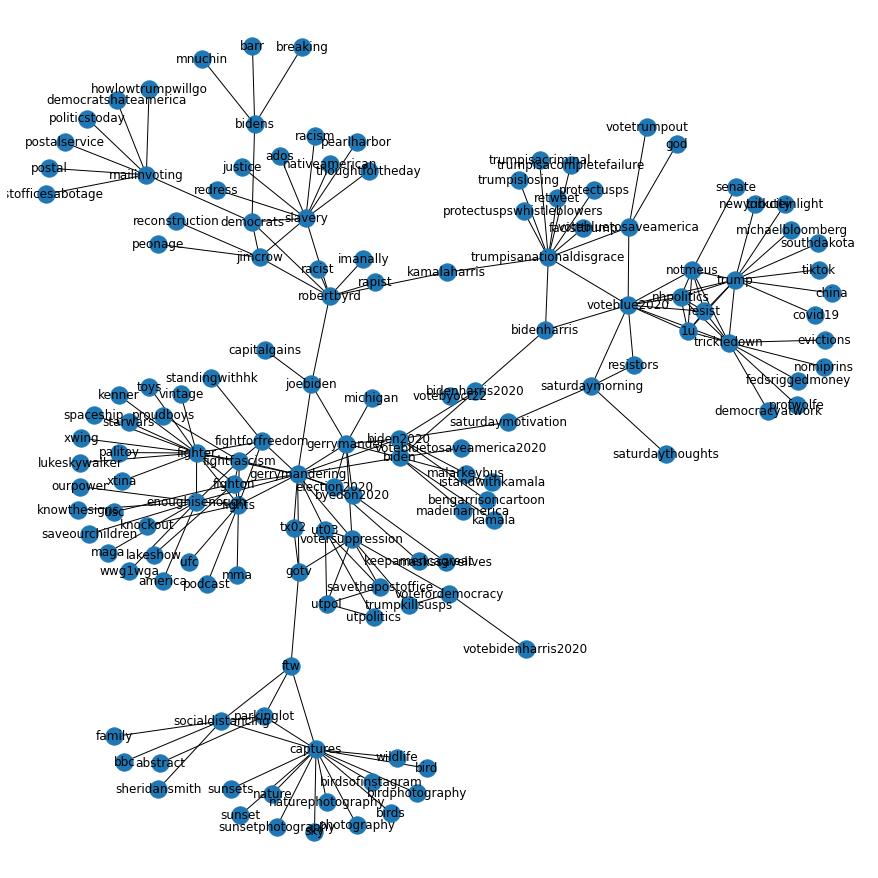

In [54]:
pos = nx.kamada_kawai_layout(G)
#labels = nx.draw_networkx_labels(G, pos)
plt.figure(figsize=(12,12)) 
nx.draw(G,pos, with_labels = True)
plt.show()

In [55]:
import plotly.graph_objects as go

In [56]:
#https://plotly.com/python/network-graphs/
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [57]:
#Color node points by the number of connections. Size by number of occurrences
node_adjacencies = []
node_text = []
node_size = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0] + ': # of connections: '+str(len(adjacencies[1])))
    node_size.append(hashtags_dict[adjacencies[0]])

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
node_trace.marker.size = node_size

In [58]:
#Create network graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python, hashtag= ' + target_hashtag,
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [59]:
import plotly

In [60]:
plotly.io.write_html(fig, r'C:\Users\kevin\Documents\jupyter notebooks\twitter\hashtag community - ' + target_hashtag[1:] + '.html')